# **Gini - Breast Cancer**

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        71
           1       0.87      0.93      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



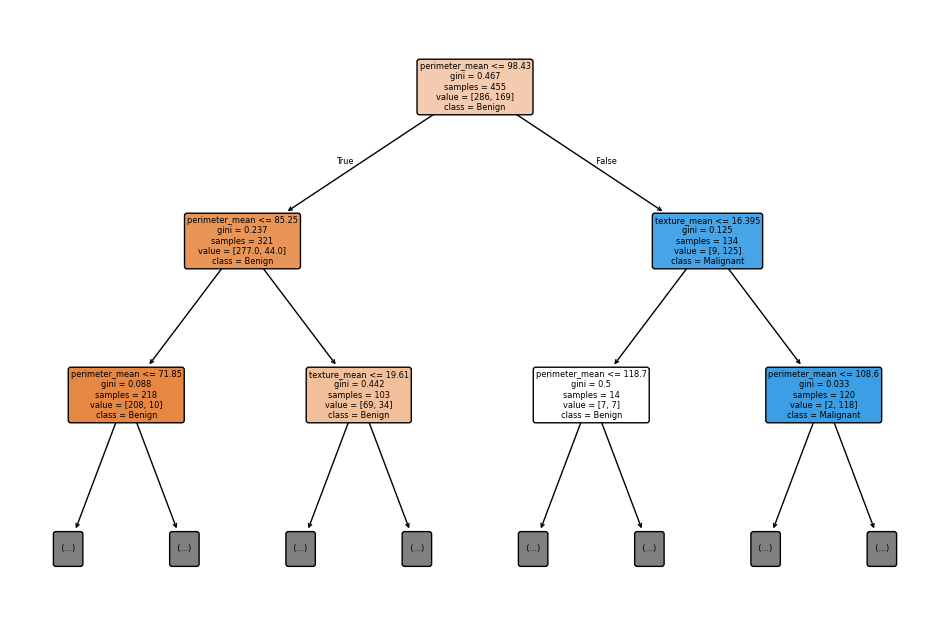

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the breast cancer dataset
df = pd.read_csv('breast-cancer.csv')

# Selecting features and target
feature_columns = ['radius_mean', 'texture_mean', 'perimeter_mean']  # Example features
target_column = 'diagnosis'  # Target column

# Encoding the target variable (assuming 'diagnosis' is categorical)
df[target_column] = df[target_column].astype('category').cat.codes

# Define features and target
X = df[feature_columns]
y = df[target_column]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=feature_columns, class_names=['Benign', 'Malignant'], rounded=True, max_depth=2)
plt.show()


# **Gini Housing Loan**

              precision    recall  f1-score   support

           N       0.38      0.30      0.34        43
           Y       0.66      0.74      0.70        80

    accuracy                           0.59       123
   macro avg       0.52      0.52      0.52       123
weighted avg       0.56      0.59      0.57       123



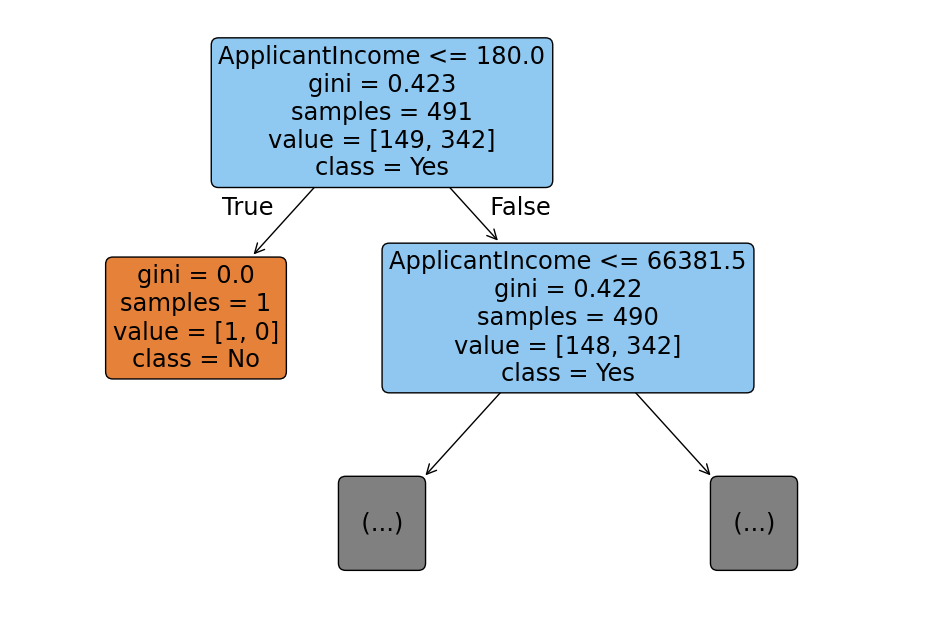

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

df= pd.read_csv('loan_sanction_train.csv')

X = df[['ApplicantIncome']]
y = df[['Loan_Status']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=['ApplicantIncome'], class_names=['No', 'Yes'], rounded=True,max_depth=1)
plt.show()

## **Gini - Wine Quality**

              precision    recall  f1-score   support

         Bad       0.55      0.59      0.57       141
        Good       0.66      0.63      0.64       179

    accuracy                           0.61       320
   macro avg       0.61      0.61      0.61       320
weighted avg       0.61      0.61      0.61       320



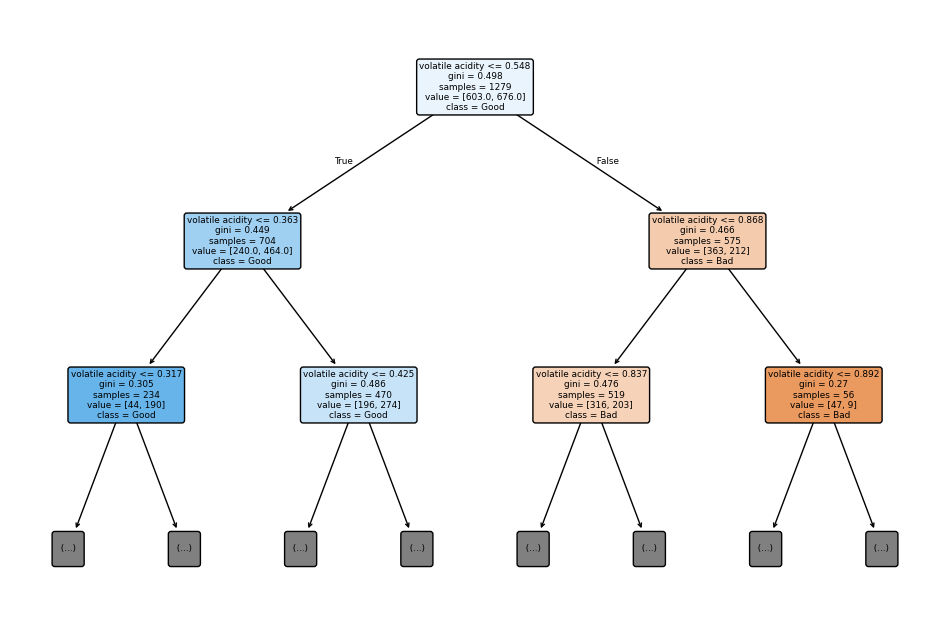

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

loan = pd.read_csv('winequality-red.csv')

X = loan[['volatile acidity']]
y = loan['quality']
y = y.apply(lambda x: 'Good' if x >= 6 else 'Bad')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=['volatile acidity'], class_names=['Bad', 'Good'], rounded=True,max_depth=2)
plt.show()

# **Gini On Sample Data**

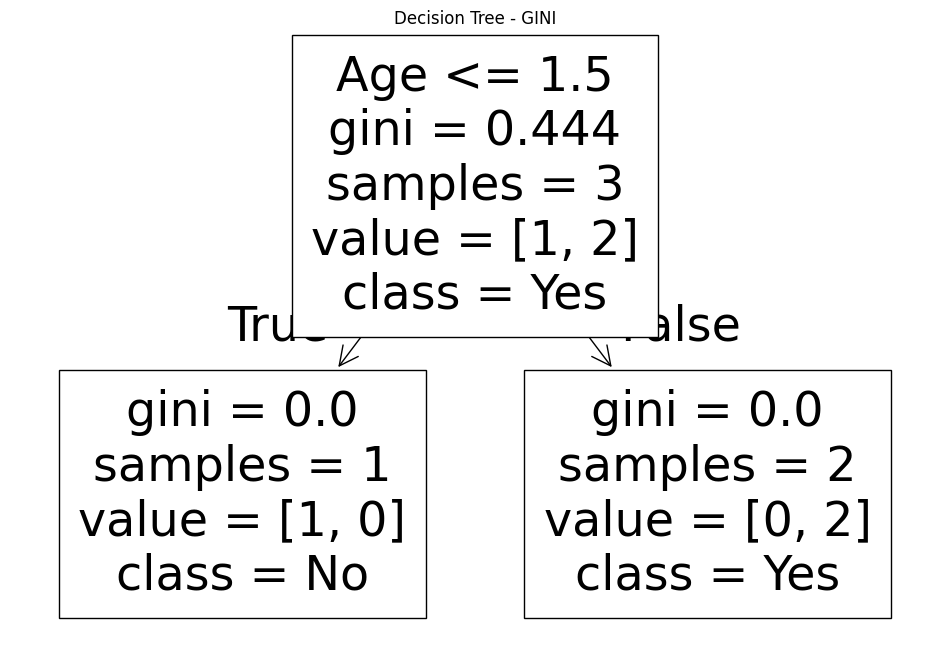

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.5
[[1 1]
 [0 0]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



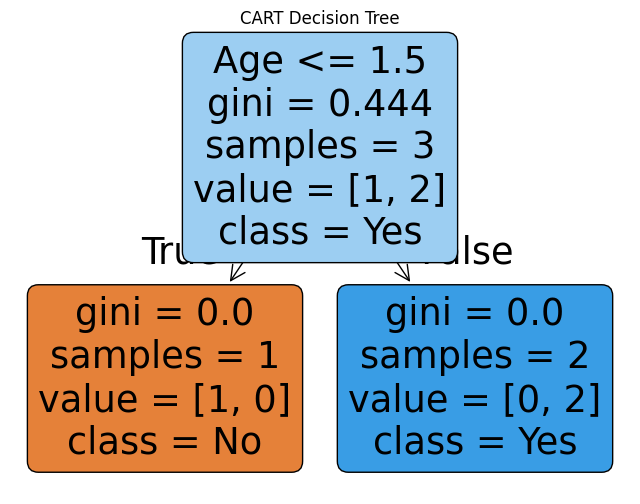

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree,DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

data = {
    'Age': [25, 45, 35, 50, 23],
    'Income': [50000, 100000, 60000, 120000, 45000],
    'Churn': ['No', 'No', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

label_encoder = LabelEncoder()
df['Age'] = label_encoder.fit_transform(df['Age'])
df['Income'] = label_encoder.fit_transform(df['Income'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])

X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns , class_names=['No', 'Yes'])
plt.title('Decision Tree - GINI')
plt.show()

y_pred = model.predict(X_test)

score = accuracy_score(y_test,y_pred)
matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)

print(score)
print(matrix)
print(report)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 8: Visualize the Decision Tree
plt.figure(figsize=(8,6))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.title('CART Decision Tree')
plt.show()

Gaurav Extra

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def gini_index(label):
  prob = label.value_counts(normalize = True)
  return 1-np.sum(prob**2)

def info_gain(df,feature,target):
  gini_before = gini_index(df[target])
  subsets = [df[df[feature]==value][target] for value in df[feature].unique()]
  weighted = sum((len(subset)/len(df))*gini_index(subset) for subset in subsets)
  return gini_before - weighted

data = {
    'Experience': [2, 2.5, 3, 4, 4.5],
    'Salary': [40, 42, 52, 60, 56],
    'Gap': [1, 1, 0, 0, 1]
}

features = ['Experience','Salary']
target = 'Gap'

df = pd.DataFrame(data)

print(f'Initial Gini Index:{gini_index(df[target])}')
for feature in features:
  print(f'Information Gain for {feature}:{info_gain(df,feature,target)}')
  for value in df[feature].unique():
    subset = df[df[feature]==value][target]
    print(f'Gini Index for {value}:{gini_index(subset)}')

Initial Gini Index:0.48
Information Gain for Experience:0.48
Gini Index for 2.0:0.0
Gini Index for 2.5:0.0
Gini Index for 3.0:0.0
Gini Index for 4.0:0.0
Gini Index for 4.5:0.0
Information Gain for Salary:0.48
Gini Index for 40:0.0
Gini Index for 42:0.0
Gini Index for 52:0.0
Gini Index for 60:0.0
Gini Index for 56:0.0


# **Any sum solver code**

In [ ]:
import numpy as np
import pandas as pd

# Function to calculate Gini index
def calculate_gini_index(labels):
    total = len(labels)
    if total == 0:
        return 0
    class_counts = labels.value_counts()
    probabilities = class_counts / total
    gini = 1 - np.sum(probabilities ** 2)
    return gini

# Function to calculate Information Gain
def calculate_information_gain(full_labels, subset_splits):
    gini_before = calculate_gini_index(full_labels)
    total_size = len(full_labels)
    weighted_gini_after_split = 0
    for subset in subset_splits:
        subset_size = len(subset)
        weighted_gini_after_split += (subset_size / total_size) * calculate_gini_index(subset)
    information_gain = gini_before - weighted_gini_after_split
    return information_gain

# Function to split dataset based on a feature
def split_dataset(df, feature):
    splits = {}
    for value in df[feature].unique():
        splits[value] = df[df[feature] == value]['Decision']
    return splits

# Function to take input dynamically
def dynamic_input():
    # Getting the number of rows in the dataset
    n = int(input("Enter the number of rows in the dataset: "))

    # Initializing dictionary to store the data
    data = {}

    # Taking column names as input
    columns = input("Enter column names separated by comma (e.g., 'Experience, Salary'): ").split(',')

    # Taking data for each column
    for column in columns:
        column = column.strip()  # Cleaning up spaces
        data[column] = []
        print(f"Enter data for column '{column}':")

        for i in range(n):
            value = input(f"Row {i+1}: ").strip()

            # Try to convert to float, if fails, treat as string
            try:
                numeric_value = float(value)
                data[column].append(numeric_value)  # Numeric column
            except ValueError:
                data[column].append(value)  # Categorical column

    # Creating DataFrame from user input
    df = pd.DataFrame(data)

    # Taking feature and target column names
    features = input("Enter feature columns separated by comma (e.g., 'Experience, Salary'): ").split(',')
    target = input("Enter the target column (e.g., 'Decision'): ").strip()

    return df, features, target

# Main code
df, features, target = dynamic_input()

# Calculating Initial Gini Index for the target column
initial_gini = calculate_gini_index(df[target])
print(f'\nInitial Gini Index: {initial_gini:.2f}')

# Loop through features to evaluate splits
for feature in features:
    print(f'\nEvaluating splits for feature: {feature}')

    subsets = split_dataset(df, feature)
    info_gain = calculate_information_gain(df[target], list(subsets.values()))
    print(f'Information Gain for feature {feature}: {info_gain:.2f}')

    for value, subset in subsets.items():
        print(f'Gini Index for subset where {feature}={value}: {calculate_gini_index(subset):.2f}')
